# Research topic:   探討2023年的八卦板鄉民對於物價上漲的反應如何

*   **課程:** 社群媒體分析
*   **組別:** 第二組
*   **學生:** M114020036曾國綸、B084020016陳育綺、B065040041蔡瑋駿
*   **爬取資料:** 2023-01-01 到 2023-03-31的PTT八卦板資料
*   **關鍵字:** 物價、物價上漲、通膨、通貨膨脹、薪水
*   **影片連結** https://www.youtube.com/watch?v=nKeSXDyMDf8

# 動機與目的：


* 2023年的台灣，雖然疫情已經趨於緩和，但因為受烏俄戰爭持續影響，國內物價持續上升，因此我們這組想了解PTT八卦板對於這幾個月來物價上漲的反應為何。



In [ ]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import package

In [ ]:
# 安裝會使用到的套件
# %pip install ckiptagger[tf,gdown] wordcloud SnowNLP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
import matplotlib
import jieba
import jieba.analyse
from datetime import datetime
from wordcloud import WordCloud 
import math
from nltk import ngrams
from collections import defaultdict
from nltk import FreqDist
from collections import Counter, namedtuple
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from numpy.linalg import norm
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import configparser, re, os, io
from wordcloud import WordCloud, ImageColorGenerator
import tweepy as tw
import time
from datetime import datetime, timedelta
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
# !wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-04-22 16:28:26--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.163.113, 142.251.163.138, 142.251.163.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v5hbuuq1u5u64g96at8ues1mo25f6ps8/1682180850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=987ed78e-b5b8-483c-a2ee-863ed3eff55e [following]
--2023-04-22 16:28:30--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v5hbuuq1u5u64g96at8ues1mo25f6ps8/1682180850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=987ed78e-b5b8-483c-a2ee-863ed3eff55e
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to d

+ 1. 資料前置作業
    - 1.1 資料前處理
    - 1.2 資料清理
    - 1.3 移除停用字與斷詞
+ 2. Lexicon-base 情緒分析
    + 2.1 正負向情緒及聲量分數折線圖
    + 2.2 正負向情緒分數比例折線圖圖
    + 2.3 文字雲
    + 2.4 正負情緒代表字
    + 2.5 每日情緒分數趨勢
+ 3. CKIP
    + 3.1 CKIP安裝
    + 3.2 使用CKIP進行自然語言處理
    + 3.3 探索分析-NER
    + 3.4 探索分析-POS
+ 4. 利用SnowNLP進行情緒分析
+ 5. TF-IDF計算
    + 5.1 計算每個詞彙的TF-IDF
    + 5.2 檢視結果
+ 6. 透過結巴斷詞與N-gram幫助建立字典
    + 6.1 Bigram
    + 6.2 Trigram
    + 6.3 建立Ngram預測模型
    + 6.4 Bigram視覺化
    + 6.5 Pairwise correlation
    + 6.6 和「雞蛋」相關性最高的十個詞彙
    + 6.7 使用詞彙關係圖畫出相關性大於0.4的組合
    + 6.8 計算文章相似度
+ 7. 結論
    



#1.資料前置作業

###1.1 資料前處理

In [ ]:
#Import the dataset
MetaData = pd.read_csv('/content/drive/MyDrive/社群媒體分析/期中報告/data/SNA_midProject_group2.csv', encoding='UTF-8')
MetaData = MetaData.rename(columns={"artContent": "sentence"})

In [ ]:
print(f"共有 {MetaData.shape[0]} 篇文章") #(row,column)
MetaData.head(1)

共有 4557 篇文章


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,sentence,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦\n\n最近看了一些IG影片\n\n介紹了一下日本東京外食\n\n很多都比台灣便宜\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt


### 1.2 資料清理


*   去除NA值
*   正規化資料清理
*   去除不是中文的字詞


In [ ]:
def clean(row):
    try:
      text = re.sub("[\t]{2,}", "", row)         # 去除兩個以上空格或tab
      text = re.sub("&.*;", "", text)           # 去除html特殊字元編碼
      text = re.sub('(新聞|網址|新聞來源|媒體來源|記者署名|完整新聞|完整新聞標題|完整新聞內文|完整新聞連結|(或短網址)|備註:|備註請放最後面|違者新聞文章刪除)', '', text)
      text = re.sub("<\w\+\w{4,}>", "", text)         # 去除阿拉伯數字
      text = re.sub("#_*", "", text)            # 去除一個或多個_
      text = re.sub("\\n", " ", text)           # 去除換行
      text = re.sub("\s{2,}", " ", text)         # 去除多個空格
      text = re.sub("^\\s+|\\s+$", "", text)        # 去除開頭/結尾有一個或多個空格(+:一次以上)
      text = re.sub('[^a-zA-Z\u4e00-\u9fa5]+', '', text)
    except:
      return ''
    return text

In [ ]:
MetaData['sentence'] = MetaData.sentence.apply(clean)

### 1.3 移除停用字與斷詞

In [ ]:
#load jieba dict
jieba.set_dictionary('/content/drive/MyDrive/社群媒體分析/期中報告/dict/dict.txt') 

#load stopwords dict
#We've added some ptt-related terms in the stopwords dict (e.g. 水桶、未滿、中文字...等)
with open('/content/drive/MyDrive/社群媒體分析/期中報告/dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

In [ ]:
def getToken(row):    
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1] # 篩選不在停用字的字與字元數大於1的字詞
    return seg_list

In [ ]:
#It will take long time to excute

MetaData['word'] = MetaData.sentence.apply(getToken)
# 將word欄位展開
MetaData_token = MetaData.explode('word') 
MetaData_token.head(1)

Building prefix dict from /content/drive/MyDrive/社群媒體分析/期中報告/dict/dict.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/社群媒體分析/期中報告/dict/dict.txt ...
Dumping model to file cache /tmp/jieba.u52ad85c290a0d3241b573aae06dd3b6b.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.u52ad85c290a0d3241b573aae06dd3b6b.cache
Loading model cost 1.413 seconds.
DEBUG:jieba:Loading model cost 1.413 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,sentence,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦最近看了一些IG影片介紹了一下日本東京外食很多都比台灣便宜不然就是差不多量卻很多CP很...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt,最近


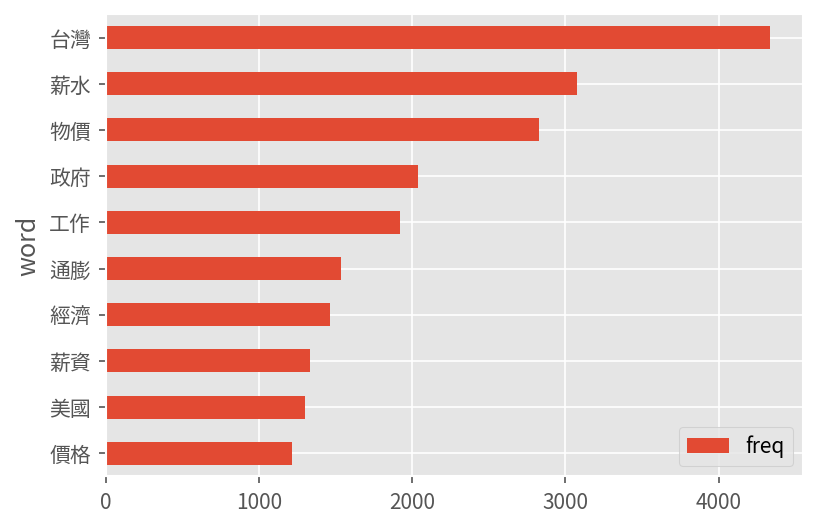

In [ ]:
#計算每天不同字的詞頻
freq_df = pd.DataFrame({'freq':MetaData_token.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)
freq_df.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

#clist = ['word','freq']
#freq_df = freq_df[clist]
#freq_df.head(10)

*    詞頻的前十名與我們要做的主題高度相關

### 2. lexicon-base 情緒分析


*   進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併。
*   為了分析聲量，我們在此加入聲量字典(name)，以進行後續分析。

In [ ]:
# 讀取情緒字典
liwc_dict = pd.read_csv("/content/drive/MyDrive/社群媒體分析/期中報告/dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict.head()

,word,sentiments
0,):,affect
1,3q,affect
2,:(,affect
3,:),affect
4,<3,affect


In [ ]:
#將情緒字典與斷詞結果進行合併
df = MetaData_token.copy()

#Convert datetime
df["artDate"] = pd.to_datetime(df["artDate"])
df["artDate"] = df["artDate"].dt.date

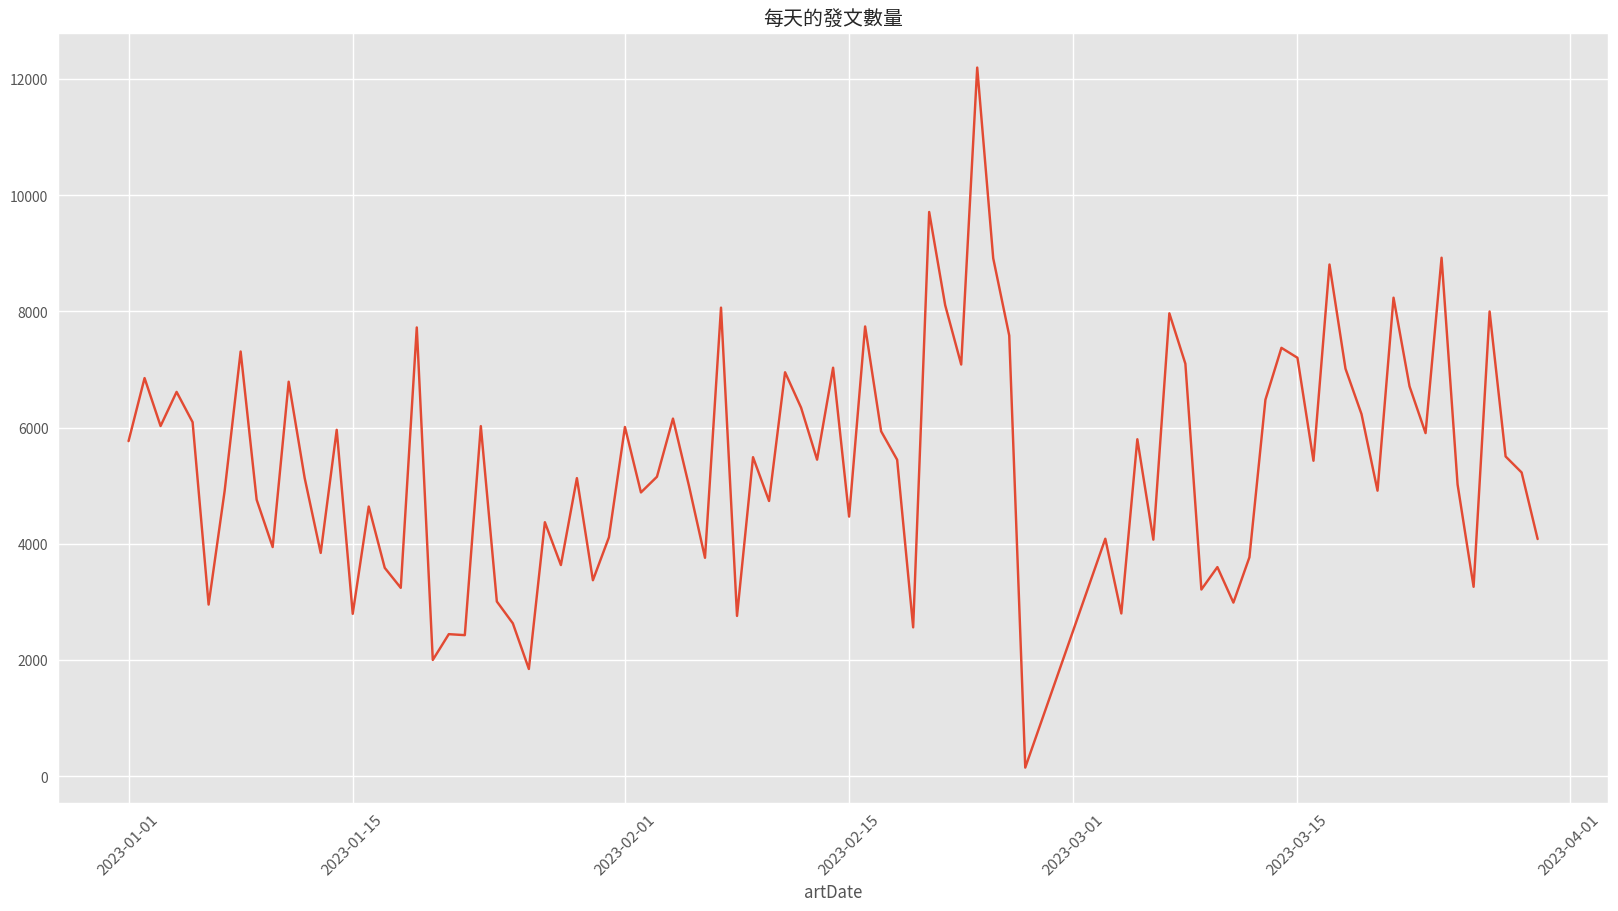

In [ ]:
data_datecount = pd.DataFrame(df.groupby('artDate').size(),columns = ['count'])

plt.figure(figsize=(20,10))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.title('每天的發文數量')
plt.xlabel('artDate')
plt.xticks(rotation= 45, fontsize=11)
plt.plot(data_datecount.index,data_datecount['count'].tolist())

*   可看出發文數量較高的時間為今年二月底左右

In [ ]:
#將情緒字典與斷詞結果進行合併
df = MetaData_token.copy()

df_liwc = pd.merge(df[["artDate", "artUrl", "word"]], liwc_dict, how="left")
#df_liwc = pd.merge(df, liwc_dict, on=['word'],how='left')

sentiment_count = df_liwc.groupby(['artDate','sentiments'],as_index=False).size()
sentiment_count.head()

,artDate,sentiments,size
0,2023-01-01,affect,401
1,2023-01-01,anger,31
2,2023-01-01,anx,29
3,2023-01-01,negative,152
4,2023-01-01,positive,229


### 2.1 正負向情緒及聲量分數折線圖

In [ ]:
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
fprop = fm.FontProperties(fname="/content/drive/MyDrive/社群媒體分析/期中報告/SourceHanSansTW-Regular.otf")

# 設定整份 notebook 圖片的長寬與 dpi
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 150

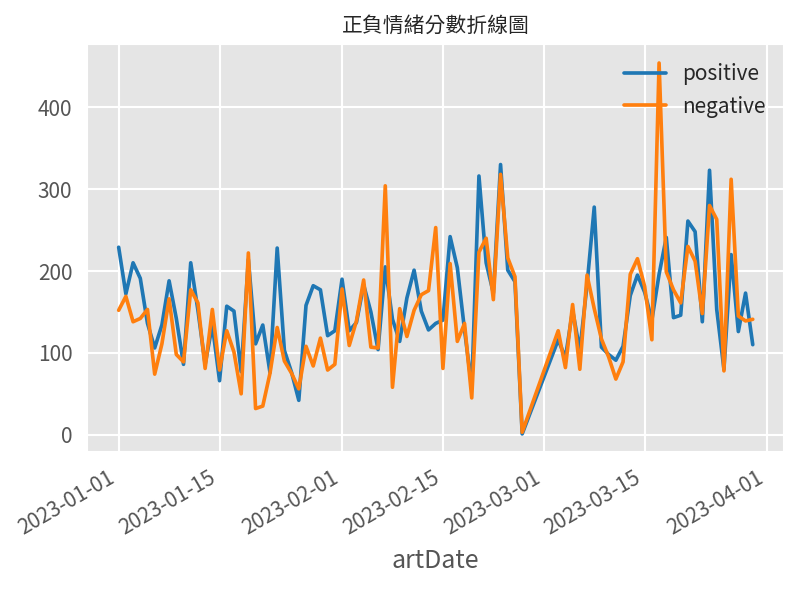

In [ ]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖", 
          fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

*   02/01至02/14這段期間，正向的情緒分數略高
*   其餘時間，正負向分數接近重疊狀態

### 2.2 正負向情緒分數比例折線圖圖

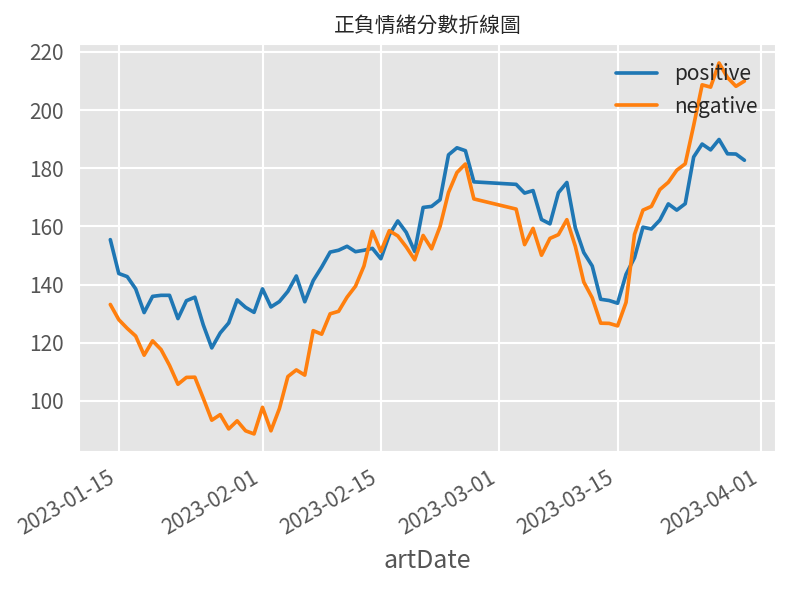

In [ ]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天移動平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

*   由折線圖更明顯看出，02/01至02/15這段期間，正向分數高於負向分數
*   03/15後，負向分數逐漸上升

### 2.3 文字雲
*    針對討論度最高的一天來畫出該天的文字雲，為02/21這天。
*    如果文字雲中的字詞大小越大，代表出現頻率越高。

In [ ]:
date = "2023-02-21"
mask = (df['artDate'] == pd.Timestamp(date))
ptt_df_wc = df.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

<ipython-input-77-505bce58551d>:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  mask = (df['artDate'] == pd.Timestamp(date))


[('雞蛋', 73),
 ('台灣', 68),
 ('政府', 65),
 ('物價', 49),
 ('蛋價', 46),
 ('工作', 35),
 ('成本', 34),
 ('通膨', 33),
 ('薪水', 32),
 ('經濟', 30),
 ('價格', 29),
 ('特別', 26),
 ('生活', 25),
 ('中國', 24),
 ('民進黨', 24),
 ('農委會', 24),
 ('上漲', 23),
 ('漲價', 23),
 ('美國', 22),
 ('企業', 21)]

### 2023/02/21文字雲

(-0.5, 399.5, 199.5, -0.5)

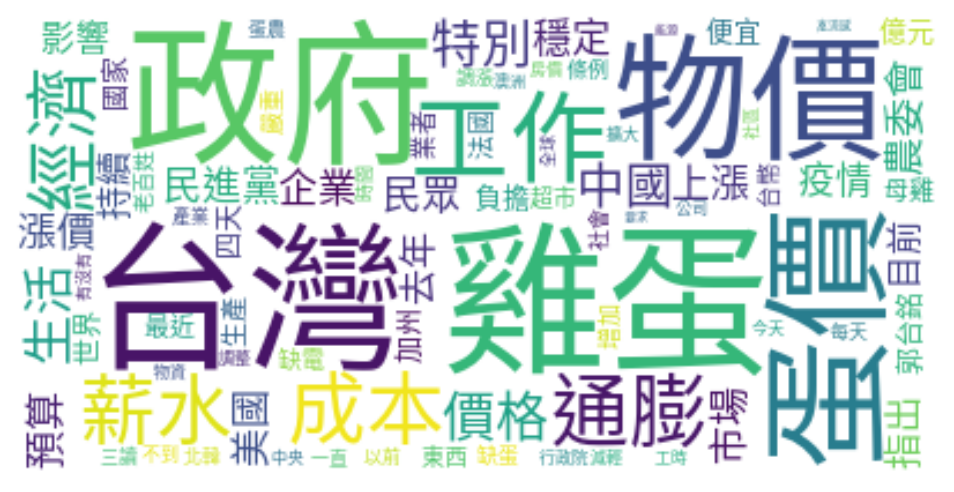

In [ ]:
# wordcloud 的 input 是 dictionary
font_path = "/content/drive/MyDrive/社群媒體分析/期中報告/SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, background_color="white", font_path=font_path)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

*   透過文字雲，可看出鄉民常討論的主題包含政府、物價、蛋價...等

### 2.4 正負向情緒代表字

In [ ]:
word_count = df_liwc.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count.head()

,word,sentiments,size
898,希望,affect,532
899,希望,positive,532
680,壓力,negative,488
644,嚴重,negative,488
679,壓力,anx,488


In [ ]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]

<ipython-input-81-2e3a42b1fcf0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
<ipython-input-81-2e3a42b1fcf0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(neg["word"], fontproperties=fprop)


Text(0.5, 1.0, '負向情緒總數')

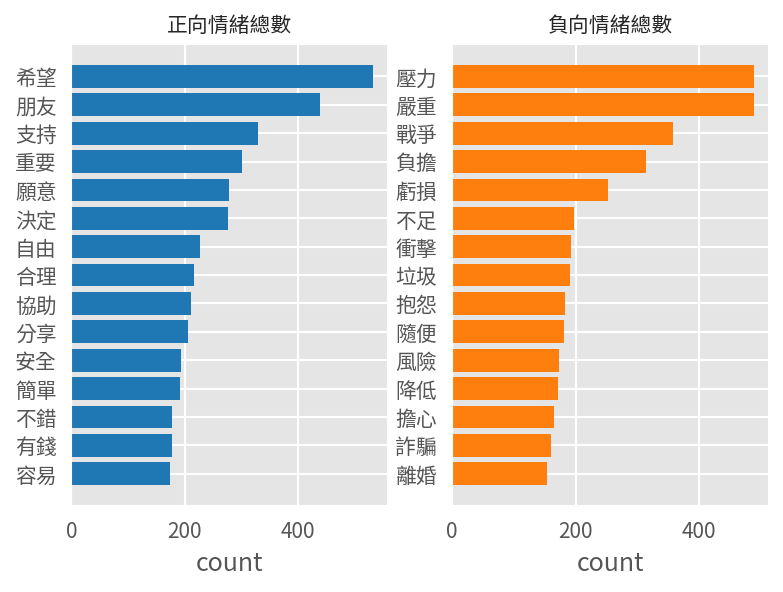

In [ ]:
pos = word_of_pos.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]
neg = word_of_neg.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

*    在負向情緒總數的排行中，壓力的詞佔了第一名，我們推測應為物價上漲造成民生壓力

### 2.5 每日情緒分數趨勢

In [ ]:
sentiment_count

,artDate,sentiments,size
0,2023-01-01,affect,401
1,2023-01-01,anger,31
2,2023-01-01,anx,29
3,2023-01-01,negative,152
4,2023-01-01,positive,229
...,...,...,...
503,2023-03-30,anger,33
504,2023-03-30,anx,39
505,2023-03-30,negative,141
506,2023-03-30,positive,110


In [ ]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

,artDate,affect,anger,anx,negative,positive,sad
0,2023-01-01,401,31,29,152,229,15
1,2023-01-02,364,48,26,169,172,41
2,2023-01-03,359,25,22,138,210,38
3,2023-01-04,364,35,26,142,191,36
4,2023-01-05,314,36,29,153,136,31


In [ ]:
# sentiment 計算方式: positive - anger - anx - negative - sad
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["anger"]
    - ptt_sentiment_value["anx"]
    - ptt_sentiment_value["negative"]
    - ptt_sentiment_value["sad"]
)
ptt_sentiment_value.head()

,artDate,affect,anger,anx,negative,positive,sad,sentiment_value
0,2023-01-01,401,31,29,152,229,15,2
1,2023-01-02,364,48,26,169,172,41,-112
2,2023-01-03,359,25,22,138,210,38,-13
3,2023-01-04,364,35,26,142,191,36,-48
4,2023-01-05,314,36,29,153,136,31,-113


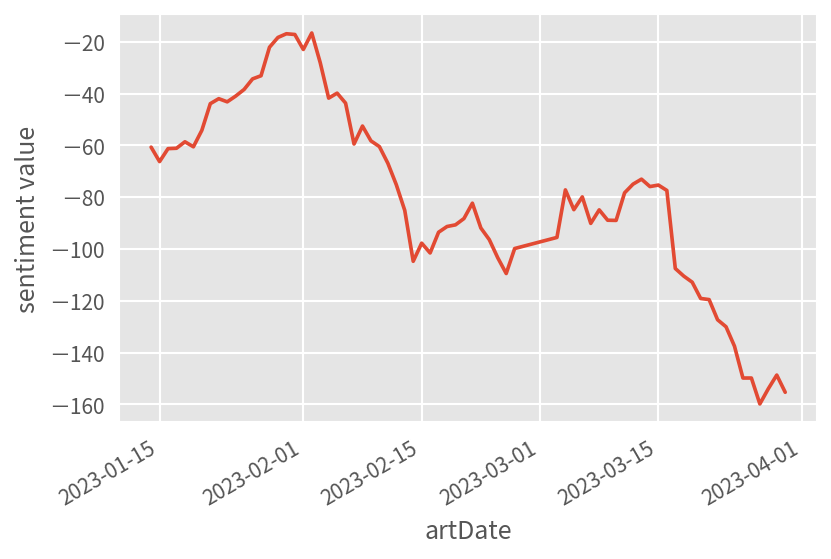

In [ ]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()

*    整體的平均情緒皆為負向

## 3. CKIP


### 3.1 CKIP安裝

In [ ]:
data_utils.download_data_gdown("./") # gdrive-ckip # 下載ckip model

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/data.zip
100%|██████████| 1.88G/1.88G [00:17<00:00, 107MB/s]


In [ ]:
# To use CPU:
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

/usr/local/lib/python3.9/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.9/dist-packages/ckiptagger/model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.9/dist-packages/ckiptagger/model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


### 3.2 使用CKIP進行自然語言處理

In [ ]:
## 讀取文章
df = pd.read_csv('/content/drive/MyDrive/社群媒體分析/期中報告/data/SNA_midProject_group2.csv')
df.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦\n\n最近看了一些IG影片\n\n介紹了一下日本東京外食\n\n很多都比台灣便宜\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1672534782....,[新聞]快訊／蔡英文揭新年4目標：規劃房貸補貼,2023-01-01 08:59:39,lovea,Gossiping,1.媒體來源:\nettoday\n\n2.記者署名:\n記者呂晏慈／台北報導\n\n3.完...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""matico"", ""cm...",125.231.180.92,2023-01-02 01:27:37,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1672536891....,[新聞]翁達瑞挨告回台面對官司到中山大學演,2023-01-01 09:34:49,asppsa,Gossiping,備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\n2.記者署名:\n記者許麗娟／\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""greensaru"", ...",111.82.79.128,2023-01-02 01:27:53,ptt


定義文字清理的相關function

In [ ]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    final_res = []
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
    
#     paragraphs = list(filter(None, article.split("\n")))
    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
#     print(len(paragraphs))
#     print(paragraphs)
    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)
            
            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space
            
            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)
            
        except:
            _logger.info("error")
            return "error"
        
        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)
    
    return result

In [ ]:
# 自定義辭典
with open('/content/drive/MyDrive/社群媒體分析/期中報告/dict/user_dict.txt') as f:
    lines = f.read().splitlines()

dict = {k.split()[0]: k.split()[1] for v, k in enumerate(lines)}
dictionary2 = construct_dictionary(dict)
print(dictionary2)

[]


In [ ]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
#     print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id,word,pos]) 
#         print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
#     print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3],entity[2]]) 
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []
    
    for index, row in data_df.iterrows(): # document level    
#         print(f"\ndocument {index}") 

        # clean data
        result = [] 
        tmp = Sentence_Segmentation(row['artContent']) 
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2) # set dictionary 
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        for i, sentence in enumerate(flat_list): # sentence level
#             print(f"sentence {i}: {sentence}")
            sentence_list.append([row['system_id'],sentence])            
            temp_tokens = get_pos(row['system_id'],word_sentence_list[i],  pos_sentence_list[i])
            temp_entites = get_ner(row['system_id'],entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)
            
    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat, 
                    columns=['system_id','word','pos'])        
    
    entity_table = pd.DataFrame(data=entity_flat, 
                        columns=['system_id','word','ner']) 

    sentence_table = pd.DataFrame(data=sentence_list, 
                    columns=['system_id','sentence']) 

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

In [ ]:
# pos_table, entity_table, sentence_table = get_nlp_result(df)

### 3.3 探索分析-NER

In [ ]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv("/content/drive/MyDrive/社群媒體分析/期中報告/data/pos_table.csv") 
entity_table = pd.read_csv("/content/drive/MyDrive/社群媒體分析/期中報告/data/entity_table.csv") 
sentence_table = pd.read_csv("/content/drive/MyDrive/社群媒體分析/期中報告/data/sentence_table.csv") 

In [ ]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(8)
ner_count

,ner,count
4,GPE,14129
13,PERSON,8851
11,ORG,6610
1,DATE,6426
0,CARDINAL,3563
8,MONEY,1891
9,NORP,1077
16,TIME,979


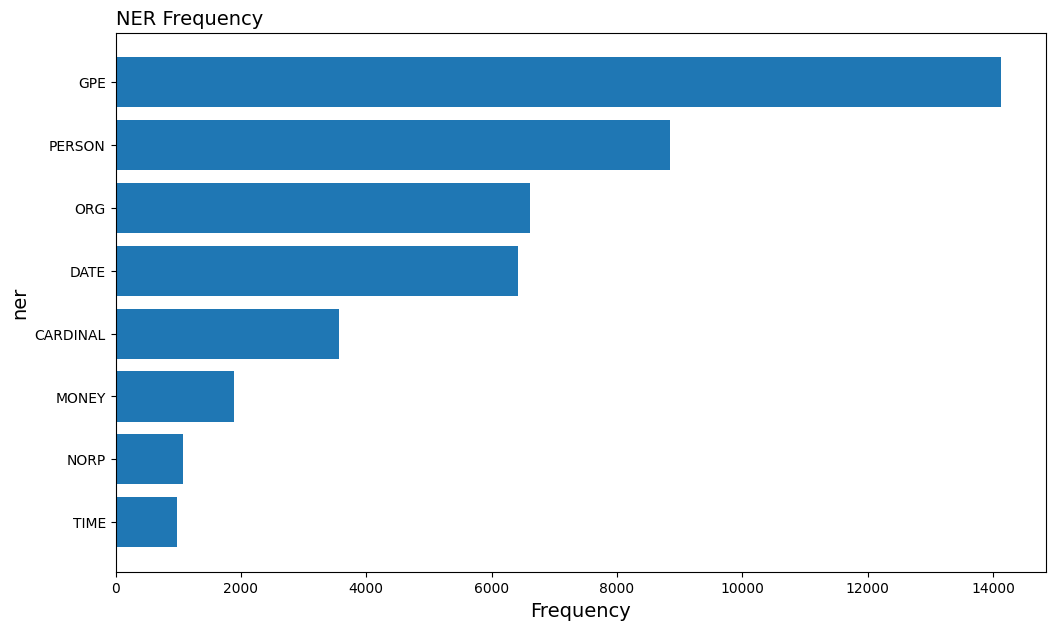

In [ ]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

*    資料集中的NER frequency以GPE為最多，推測是因為資料中大量出現「台灣」的詞

### 涉及到的人名(PERSON)

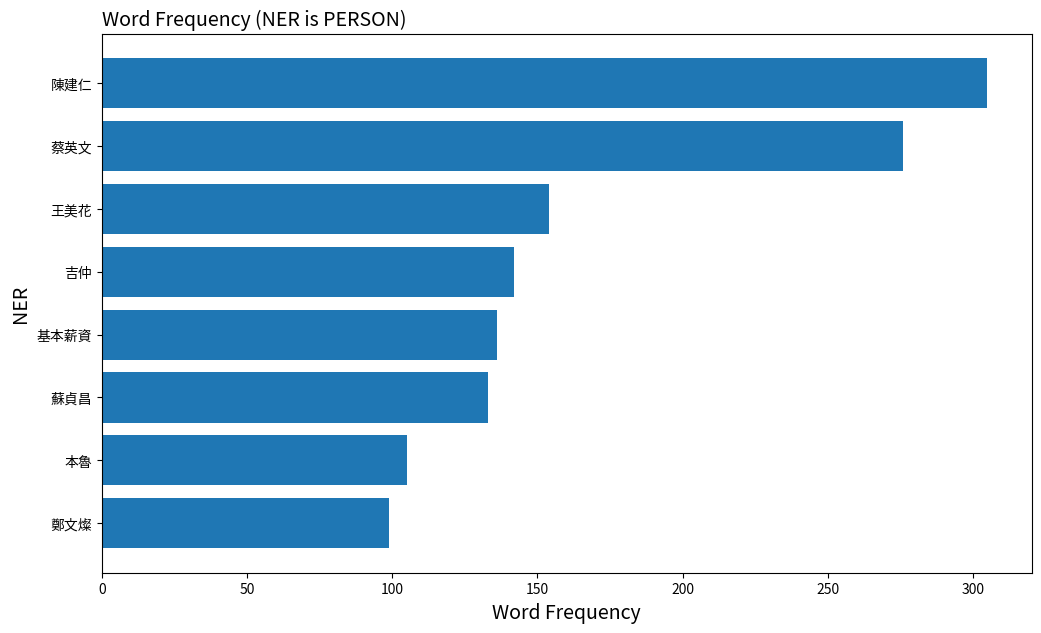

In [ ]:
# 篩選ner為名詞的資料
l_noun = ["PERSON"]
PERSON = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前8個
ner_count = PERSON.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is PERSON)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

*    在NER的person中的前十名大部分為我國的政治人物

### 涉及到的組織(ORG)

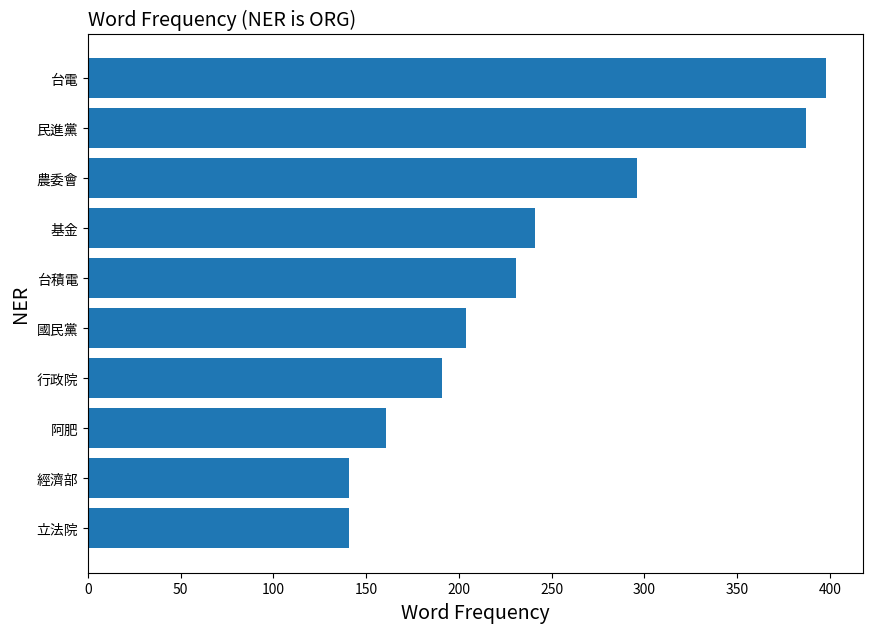

In [ ]:
# 篩選ner為名詞的資料
l_noun = ["ORG"]
ORG = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = ORG.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

*   因為今年4月電價調漲上路，所以台電的討論度會比較高

### 涉及到的民族、宗教、政治團體(NORP)

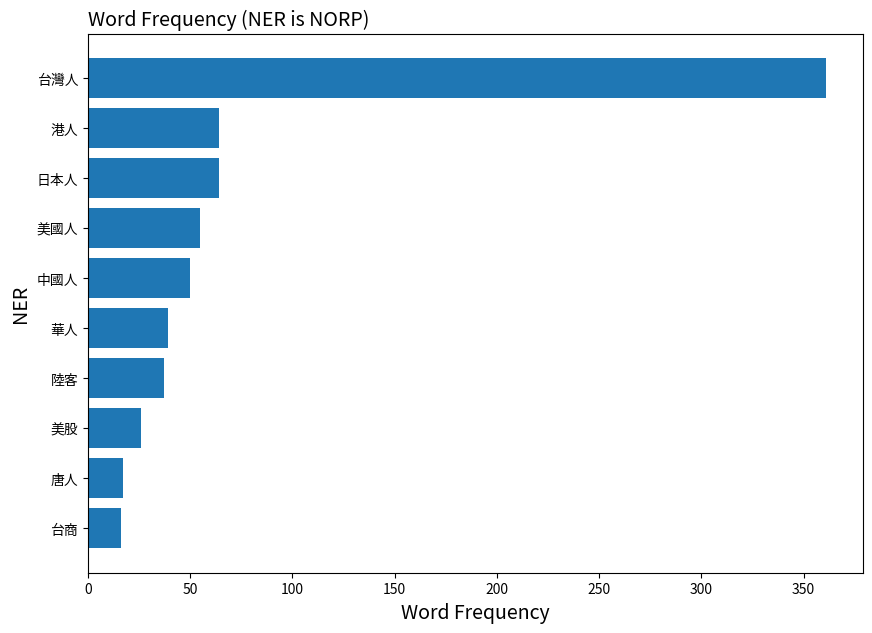

In [ ]:
# 篩選ner為名詞的資料
l_noun = ["NORP"]
NORP = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = NORP.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is NORP)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

### 3.4 探索分析-POS

In [ ]:
pos_filter = pos_table[~pos_table.pos.isin(['COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY'])]

pos_count = pos_filter.groupby(['pos'])['pos'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(12)
pos_count

,pos,count
14,Na,151378
34,VC,43754
40,VH,40770
16,Nc,34332
4,D,22172
31,VA,16632
37,VE,13472
15,Nb,11593
43,VJ,11332
24,Nf,10922


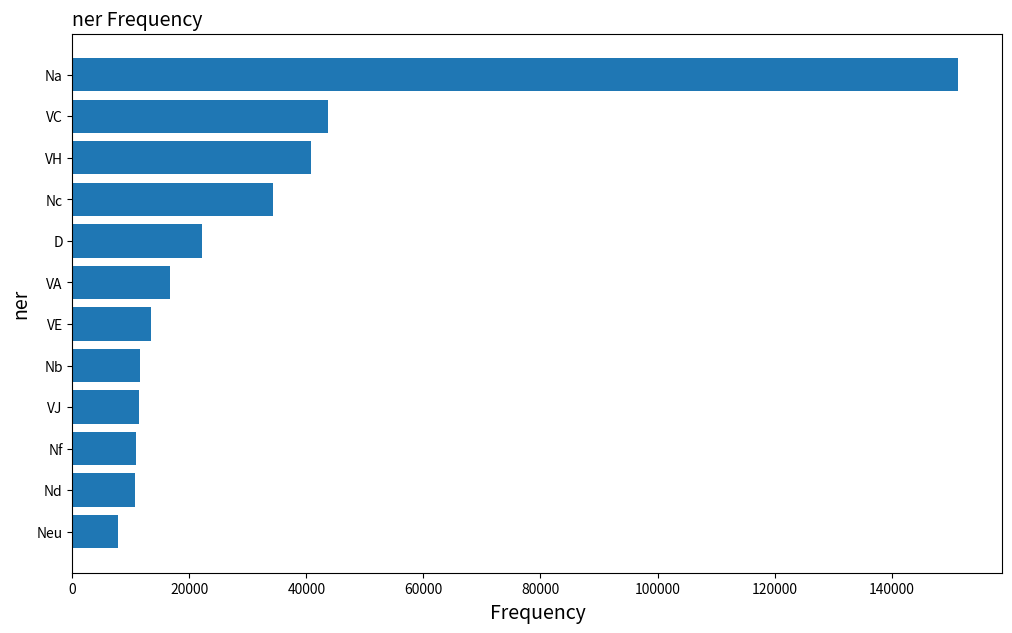

In [ ]:
pos = pos_count['pos']
count = pos_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(pos, count)
ax.invert_yaxis()
ax.set_title('ner Frequency',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

### 涉及到的名詞(Noun)

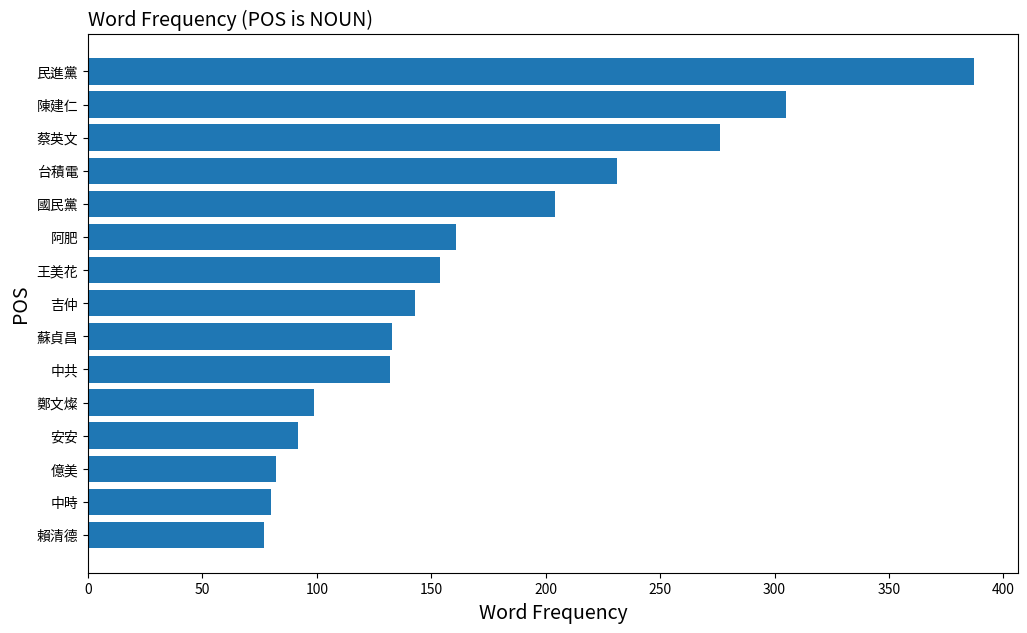

In [ ]:
# 篩選pos為名詞的資料
l_noun = ["Nb"] #,"Na"
noun = pos_table[pos_table.pos.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前15個
noun_count = noun[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)

# 設定中文字形
#plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = noun_count['word']
count = noun_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is NOUN)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

### 涉及到的動詞(VERB)

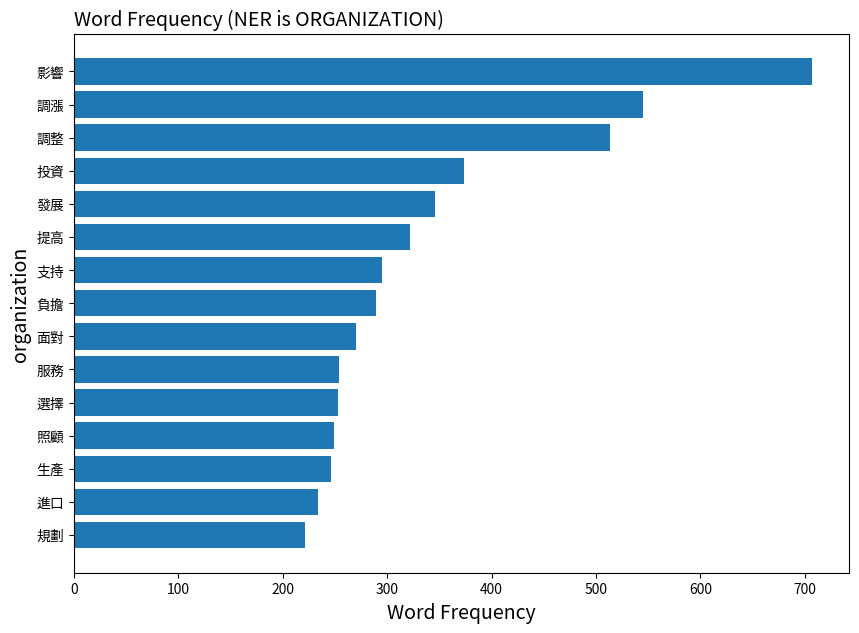

In [ ]:
l_verb = ["VC"] # ,"VH","VA"
verb = pos_table[pos_table.pos.isin(l_verb)] # 選取特定詞性
verb = verb[verb['word'].map(len) > 1] # 把長度為1的字去除掉

verb_count = verb[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)

word = verb_count['word']
count = verb_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORGANIZATION)',loc ='left', size = 14)
ax.set_ylabel('organization', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

In [ ]:
keyword_list = ['物價']
price_selected = df[df['artContent'].str.contains('|'.join(keyword_list),regex=True)]
print(f"{' '.join(keyword_list)}：{price_selected.shape[0]}篇相關貼文")
price_selected.head(3)

物價：1710篇相關貼文


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦\n\n最近看了一些IG影片\n\n介紹了一下日本東京外食\n\n很多都比台灣便宜\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1672534782....,[新聞]快訊／蔡英文揭新年4目標：規劃房貸補貼,2023-01-01 08:59:39,lovea,Gossiping,1.媒體來源:\nettoday\n\n2.記者署名:\n記者呂晏慈／台北報導\n\n3.完...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""matico"", ""cm...",125.231.180.92,2023-01-02 01:27:37,ptt
3,4,https://www.ptt.cc/bbs/Gossiping/M.1672537600....,[問卦]慟！！巷口早餐店元月一日全品項漲5元,2023-01-01 09:46:32,a520,Gossiping,淦！\n\n漲了！又漲了！\n\n去年蛋價漲。加蛋5元漲10元\n\n現在全部再漲5元\n\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""horseorange""...",101.12.16.80,2023-01-02 01:27:53,ptt


## 4. 利用SnowNLP進行情緒分析

In [ ]:
from snownlp import SnowNLP
sentence_table = pd.read_csv("/content/drive/MyDrive/社群媒體分析/期中報告/data/sentence_table.csv") 

sentiment_date = pd.merge(sentence_table,price_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date.head()

,system_id,sentence,artDate,dataSource
0,1,最近,2023-01-01 01:55:06,ptt
1,1,影片,2023-01-01 01:55:06,ptt
2,1,介紹,2023-01-01 01:55:06,ptt
3,1,下,2023-01-01 01:55:06,ptt
4,1,日本,2023-01-01 01:55:06,ptt


In [ ]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# 幫每句話加上情緒分數
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date.head()

,system_id,sentence,artDate,dataSource,sentimentValue
0,1,最近,2023-01-01 01:55:06,ptt,0.526233
1,1,影片,2023-01-01 01:55:06,ptt,0.458333
2,1,介紹,2023-01-01 01:55:06,ptt,0.854056
3,1,下,2023-01-01 01:55:06,ptt,0.504198
4,1,日本,2023-01-01 01:55:06,ptt,0.740000


<Axes: >

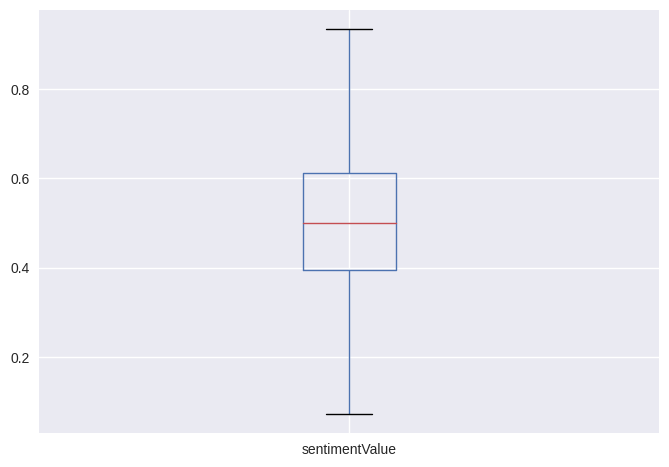

In [ ]:
# 情緒分布的盒狀圖
boxplot = sentiment_date.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

In [ ]:
sent_date = sentiment_date.copy()
sent_date['artDate'] =  pd.to_datetime(sentiment_date['artDate']).dt.to_period('M')

sentiment_count = sent_date.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count.head()

,artDate,sentimentValue
0,2023-01,0.502668
1,2023-02,0.498479
2,2023-03,0.498420


<ipython-input-58-d7856a811657>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


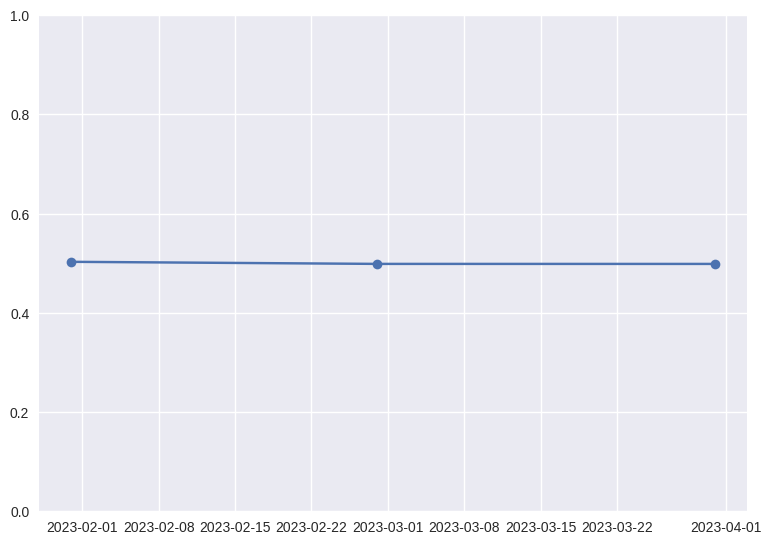

In [ ]:
# 平均情緒分數時間趨勢
plt.style.use('seaborn')

months = sentiment_count['artDate']
y = sentiment_count['sentimentValue']

plt.plot_date(months, y, linestyle='solid')
plt.gcf().autofmt_xdate
plt.tight_layout()
plt.ylim(0,1)

plt.show()

## 5. TF-IDF
### 5.1 計算每個詞彙的TF-IDF
TF-IDF 是一種統計方法，可用來評估單詞對於文件的集合的重要程度  
- **TF** (Term Frequency)：某一個詞彙在某一個文件中所出現的頻率  
    - TF = 詞彙在該文件中出現次數 / 該文件中詞彙總數  
- **IDF** (Inverse Document Frequent)：為文件數除以某特定詞彙有被多少文件所提及的數量取log  
    - IDF = log( 總文件數量 / 包含該詞彙的文件數量 ) 



In [ ]:
# 每篇文章的總詞彙數
data = MetaData_token.copy()
total_words = data.groupby(['artUrl'],as_index=False).size()
total_words.rename(columns={'size': 'total'}, inplace=True)
total_words

,artUrl,total
0,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,29
1,https://www.ptt.cc/bbs/Gossiping/M.1672534782....,299
2,https://www.ptt.cc/bbs/Gossiping/M.1672536891....,215
3,https://www.ptt.cc/bbs/Gossiping/M.1672537600....,44
4,https://www.ptt.cc/bbs/Gossiping/M.1672538094....,482
...,...,...
4552,https://www.ptt.cc/bbs/Gossiping/M.1680186802....,27
4553,https://www.ptt.cc/bbs/Gossiping/M.1680190205....,63
4554,https://www.ptt.cc/bbs/Gossiping/M.1680191329....,64
4555,https://www.ptt.cc/bbs/Gossiping/M.1680191336....,23


In [ ]:
# 計算各詞彙在各文章中出現的次數
word_count = data.groupby(['artUrl','word'],as_index=False).size()
word_count.rename(columns={'size': 'count'}, inplace=True)
word_count

,artUrl,word,count
0,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,CP,1
1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,IG,1
2,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,QAQ,1
3,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,一下,1
4,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,人力,1
...,...,...,...
329319,https://www.ptt.cc/bbs/Gossiping/M.1680191656....,食物,1
329320,https://www.ptt.cc/bbs/Gossiping/M.1680191656....,高利貸,40
329321,https://www.ptt.cc/bbs/Gossiping/M.1680191656....,高興,1
329322,https://www.ptt.cc/bbs/Gossiping/M.1680191656....,高達,1


In [ ]:
#合併每個詞彙在每篇文章中出現的次數 與 每篇文章的詞數
price_words = word_count.merge(total_words,on = 'artUrl',how = 'left')
price_words

,artUrl,word,count,total
0,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,CP,1,29
1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,IG,1,29
2,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,QAQ,1,29
3,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,一下,1,29
4,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,人力,1,29
...,...,...,...,...
329319,https://www.ptt.cc/bbs/Gossiping/M.1680191656....,食物,1,596
329320,https://www.ptt.cc/bbs/Gossiping/M.1680191656....,高利貸,40,596
329321,https://www.ptt.cc/bbs/Gossiping/M.1680191656....,高興,1,596
329322,https://www.ptt.cc/bbs/Gossiping/M.1680191656....,高達,1,596


In [ ]:
#以每篇文章爲單位，計算每個詞彙的tf
price_words_tf_idf = price_words.assign(tf = price_words.iloc[:,2]/price_words.iloc[:,3])
price_words_tf_idf.head()

,artUrl,word,count,total,tf
0,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,CP,1,29,0.034483
1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,IG,1,29,0.034483
2,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,QAQ,1,29,0.034483
3,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,一下,1,29,0.034483
4,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,人力,1,29,0.034483


In [ ]:
# 計算每個詞彙出現在幾篇文章中
idf_df = price_words.groupby(['word'],as_index=False).size()
price_words_tf_idf = price_words_tf_idf.merge(idf_df,on = 'word',how = 'left')
price_words_tf_idf.head()

,artUrl,word,count,total,tf,size
0,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,CP,1,29,0.034483,29
1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,IG,1,29,0.034483,12
2,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,QAQ,1,29,0.034483,6
3,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,一下,1,29,0.034483,400
4,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,人力,1,29,0.034483,162


In [ ]:
# 計算idf
price_words_tf_idf = price_words_tf_idf.assign(idf = price_words_tf_idf.iloc[:,5]
                                               .apply(lambda x: math.log((len(total_words)/x),10)))
price_words_tf_idf = price_words_tf_idf.drop(labels=['size'],axis=1)
price_words_tf_idf.head()

,artUrl,word,count,total,tf,idf
0,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,CP,1,29,0.034483,2.196281
1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,IG,1,29,0.034483,2.579498
2,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,QAQ,1,29,0.034483,2.880528
3,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,一下,1,29,0.034483,1.056619
4,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,人力,1,29,0.034483,1.449164


In [ ]:
# 計算tf*idf
price_words_tf_idf = price_words_tf_idf.assign(tf_idf = price_words_tf_idf.iloc[:,4] * price_words_tf_idf.iloc[:,5])
price_words_tf_idf.head()

,artUrl,word,count,total,tf,idf,tf_idf
0,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,CP,1,29,0.034483,2.196281,0.075734
1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,IG,1,29,0.034483,2.579498,0.088948
2,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,QAQ,1,29,0.034483,2.880528,0.099329
3,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,一下,1,29,0.034483,1.056619,0.036435
4,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,人力,1,29,0.034483,1.449164,0.049971


### 5.2 檢視結果

In [ ]:
# 選出每篇文章，tf-idf值最大的前五個詞
group = price_words_tf_idf.groupby("artUrl").apply(lambda x : x.nlargest(5, "tf_idf"))

In [ ]:
group.loc[:,["word","tf_idf"]][0:15]

word    tf_idf
artUrl                                                               
https://www.ptt.cc/bbs/Gossiping/M.1672509308.A... 7    兩三倍  0.105401
                                                   2    QAQ  0.099329
                                                   9     同等  0.097020
                                                   1     IG  0.088948
                                                   21    物流  0.085606
https://www.ptt.cc/bbs/Gossiping/M.1672534782.A... 176  蔡英文  0.044149
                                                   60    動能  0.034392
                                                   134   減輕  0.032212
                                                   117   月票  0.027648
                                                   164   經濟  0.023367
https://www.ptt.cc/bbs/Gossiping/M.1672536891.A... 232   中山  0.085301
                                                   366  鄭英耀  0.051051
                                                   327   結訓  0.046851
                                                   272   大學  0.042791
                                                   267  國際化  0.042650

### 計算整個文集中較常 tf-idf 值高的字

In [ ]:
# 從每篇文章挑選出tf-idf最大的前十個詞
(price_words_tf_idf.groupby("artUrl").apply(lambda x : x.nlargest(10, "tf_idf")).reset_index(drop=True)
# 計算每個詞被選中的次數
.groupby(['word'],as_index=False).size()
).sort_values('size', ascending=False).head(10) # 排序看前十名

,word,size
12150,日本,93
17300,美國,86
4475,公務員,83
22111,電價,82
3540,便當,68
22029,雞蛋,67
6100,台灣,66
5583,升息,64
19163,調漲,63
18298,薪資,61


## 6.透過結巴斷詞與N-gram幫助建立字典

### 6.1 Bigram

In [ ]:
# 設定 bigram 斷詞 function
def bigram_getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]
    seg_list = ngrams(seg_list, 2)
    seg_list = [" ".join(w) for w in list(seg_list)]
    return seg_list

In [ ]:
price_bigram = MetaData.copy()

price_bigram["word"] = price_bigram.sentence.apply(bigram_getToken)
price_bigram = price_bigram.explode('word')
price_bigram.head(3)

Building prefix dict from /content/drive/MyDrive/社群媒體分析/期中報告/dict/dict.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/社群媒體分析/期中報告/dict/dict.txt ...
Loading model from cache /tmp/jieba.u52ad85c290a0d3241b573aae06dd3b6b.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u52ad85c290a0d3241b573aae06dd3b6b.cache
Loading model cost 0.470 seconds.
DEBUG:jieba:Loading model cost 0.470 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,sentence,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦最近看了一些IG影片介紹了一下日本東京外食很多都比台灣便宜不然就是差不多量卻很多CP很...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt,最近 IG
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦最近看了一些IG影片介紹了一下日本東京外食很多都比台灣便宜不然就是差不多量卻很多CP很...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt,IG 影片
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦最近看了一些IG影片介紹了一下日本東京外食很多都比台灣便宜不然就是差不多量卻很多CP很...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt,影片 介紹


#### 統計最常出現的bigram組合

In [ ]:
# 計算每個組合出現的次數
price_bigram_count = price_bigram.groupby(["word"],as_index=False).size()
# 清除包含英文或數字的bigram組合
fb_filter = list(price_bigram_count["word"].apply(lambda x: True if not re.search("[0-9a-zA-Z]",x) else False))
price_bigram_count[fb_filter].sort_values(by=['size'], ascending=False).head(10)

,word,size
215927,物價 上漲,323
25325,主計 總處,182
77474,台灣 物價,145
216280,物價 指數,131
40772,俄烏 戰爭,129
69716,印度 神童,128
205923,消費者 物價,101
217196,特別 條例,96
77662,台灣 經濟,96
332666,雞蛋 價格,94


### 6.2 Trigram

In [ ]:
# 設定 trigram 斷詞 function
def trigram_getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]
    seg_list = ngrams(seg_list, 3)
    seg_list = [" ".join(w) for w in list(seg_list)]
    return seg_list

In [ ]:
price_trigram = MetaData.copy()

price_trigram["word"] = price_trigram.sentence.apply(trigram_getToken)
price_trigram = price_trigram.explode('word')
price_trigram.head(3)

Building prefix dict from /content/drive/MyDrive/社群媒體分析/期中報告/dict/dict.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/社群媒體分析/期中報告/dict/dict.txt ...
Loading model from cache /tmp/jieba.u52ad85c290a0d3241b573aae06dd3b6b.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u52ad85c290a0d3241b573aae06dd3b6b.cache
Loading model cost 0.473 seconds.
DEBUG:jieba:Loading model cost 0.473 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,sentence,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦\n\n最近看了一些IG影片\n\n介紹了一下日本東京外食\n\n很多都比台灣便宜\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt,最近 IG 影片
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦\n\n最近看了一些IG影片\n\n介紹了一下日本東京外食\n\n很多都比台灣便宜\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt,IG 影片 介紹
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦\n\n最近看了一些IG影片\n\n介紹了一下日本東京外食\n\n很多都比台灣便宜\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt,影片 介紹 一下


#### 統計最常出現的trigram組合

In [ ]:
# 計算每個組合出現的次數
price_trigram_count = price_trigram.groupby(["word"],as_index=False).size()
# 清除包含英文或數字的trigram組合
fb_filter = list(price_trigram_count["word"].apply(lambda x: True if not re.search("[0-9a-zA-Z]",x) else False))
price_trigram_count[fb_filter].sort_values(by=['size'], ascending=False).head(10)

,word,size
272195,消費者 物價 指數,66
165089,實質 經常性 薪資,46
166825,專板 本板 政治,40
139827,國際 燃料 價格,39
389328,農委會 主委 吉仲,37
111830,印度 神童 預言,35
423206,電價 費率 審議會,32
89120,全民 共享 經濟,30
325134,經濟 社會 韌性,30
94681,共享 經濟 成果,30


### 6.3 使用Ngram建立模型

### Bigram預測模型

In [ ]:
data = MetaData.copy()
sen_tokens = data.sentence.apply(getToken).tolist()

Building prefix dict from /content/drive/MyDrive/社群媒體分析/期中報告/dict/dict.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/社群媒體分析/期中報告/dict/dict.txt ...
Loading model from cache /tmp/jieba.u52ad85c290a0d3241b573aae06dd3b6b.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u52ad85c290a0d3241b573aae06dd3b6b.cache
Loading model cost 0.510 seconds.
DEBUG:jieba:Loading model cost 0.510 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
def ngram(documents, N=2):
    ngram_prediction = dict()
    total_grams = list()
    words = list()
    Word = namedtuple('Word', ['word', 'prob'])

    for doc in documents:
        # 加上開頭和結尾 tag
        split_words = ['<s>'] + list(doc) + ['</s>']
        # 計算分子
        [total_grams.append(tuple(split_words[i:i+N])) for i in range(len(split_words)-N+1)]
        # 計算分母
        [words.append(tuple(split_words[i:i+N-1])) for i in range(len(split_words)-N+2)]
        
    total_word_counter = Counter(total_grams)
    word_counter = Counter(words)
    
    for key in total_word_counter:
        word = ''.join(key[:N-1])
        if word not in ngram_prediction:
            ngram_prediction.update({word: set()})
            
        next_word_prob = total_word_counter[key]/word_counter[key[:N-1]] #P(B|A)
        w = Word(key[-1], '{:.3g}'.format(next_word_prob))
        ngram_prediction[word].add(w)
        
    return ngram_prediction

In [ ]:
# Bigram預測模型為例
bi_prediction = ngram(sen_tokens, N=2)

### 預測下一個出現的詞

In [ ]:
text = '物價'
next_words = list(bi_prediction[text])
next_words.sort(key = lambda s: s[1], reverse = True)
for next_word in next_words[:5]:
    print('next word: {}, probability: {}'.format(next_word.word, next_word.prob))

next word: 上漲, probability: 0.114
next word: 指數, probability: 0.0464
next word: 房價, probability: 0.0251
next word: 飛漲, probability: 0.0237
next word: 高漲, probability: 0.0195


In [ ]:
text = '政府'
next_words = list(bi_prediction[text])
next_words.sort(key = lambda s: s[1], reverse = True)
for next_word in next_words[:5]:
    print('next word: {}, probability: {}'.format(next_word.word, next_word.prob))

next word: 補助, probability: 0.0132
next word: 持續, probability: 0.0103
next word: 物價, probability: 0.00833
next word: </s>, probability: 0.00784
next word: 補貼, probability: 0.00784


In [ ]:
text = '雞蛋'
next_words = list(bi_prediction[text])
next_words.sort(key = lambda s: s[1], reverse = True)
for next_word in next_words[:5]:
    print('next word: {}, probability: {}'.format(next_word.word, next_word.prob))

next word: 價格, probability: 0.09
next word: 供應, probability: 0.0498
next word: 產量, probability: 0.0211
next word: 漲價, probability: 0.0172
next word: 批發價, probability: 0.0153


### 6.4 Bigram視覺化

In [ ]:
# 使用FreqDist 取得 bigram 斷詞 與 bigram出現頻率
bigramfdist = FreqDist()
def bigram_getToken_dict(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]
    bigramfdist.update(ngrams(seg_list, 2))
    seg_list2 = ngrams(seg_list, 2)
    seg_list = [" ".join(w) for w in list(seg_list2)]
    return seg_list

In [ ]:
price_bigram2 = MetaData.copy()
price_bigram2["word"] = price_bigram2.sentence.apply(bigram_getToken_dict)

In [ ]:
price_bigram2 = price_bigram2.explode('word')
price_bigram2.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,sentence,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦最近看了一些IG影片介紹了一下日本東京外食很多都比台灣便宜不然就是差不多量卻很多CP很...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt,最近 IG
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦最近看了一些IG影片介紹了一下日本東京外食很多都比台灣便宜不然就是差不多量卻很多CP很...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt,IG 影片
0,1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,peterlin495,Gossiping,如題啦最近看了一些IG影片介紹了一下日本東京外食很多都比台灣便宜不然就是差不多量卻很多CP很...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mastoid"", ""c...",111.71.30.250,2023-01-02 01:26:38,ptt,影片 介紹


In [ ]:
d = {k:v for k,v in bigramfdist.most_common(50)}

In [ ]:
# Create network plot 
G = nx.Graph()

# 建立 nodes 間的連結
for k, v in [d][0].items():
    G.add_edge(k[0], k[1], weight=v)
    
# 取得edge權重
weights = [w[2]['weight']*0.01 for w in  G.edges(data=True)]

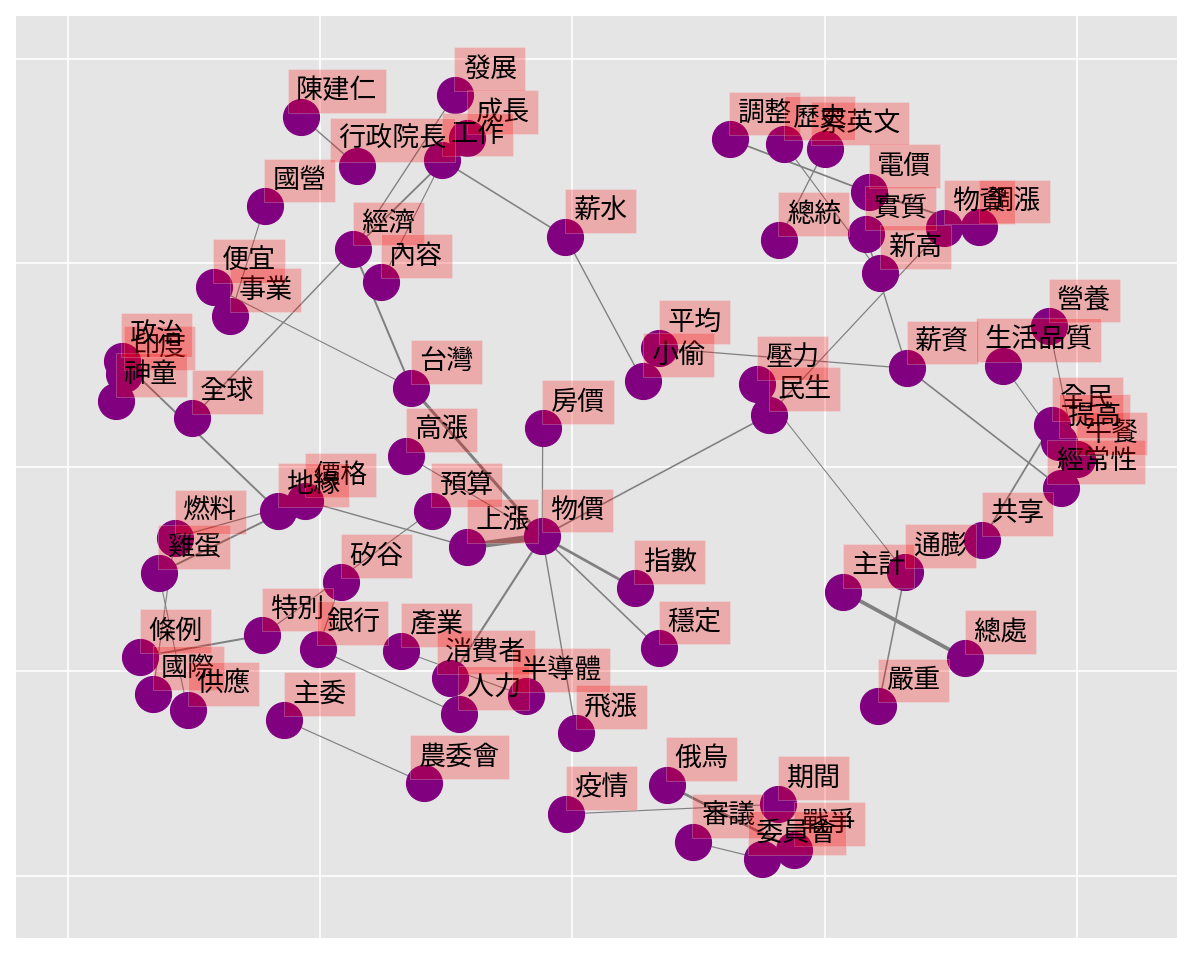

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# 增加 labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### 6.5 Pairwise correlation
計算兩個詞彙間的相關性 Phi相關係數(Phi coefficient)

In [ ]:
# 取常一起出現的bigram pair 前1500筆
b = {k:v for k,v in bigramfdist.most_common(1500)}

In [ ]:
# 建立DataFrame
bigram_df = pd.DataFrame(list(b), columns=['word','word2']).assign(n=b.values())

In [ ]:
# 每個bigram組合的次數
bigram_df.head()

,word,word2,n
0,物價,上漲,323
1,主計,總處,182
2,台灣,物價,145
3,物價,指數,131
4,俄烏,戰爭,129


In [ ]:
# 再次計算各詞彙在各文章中出現的次數
data = MetaData.copy()
data['word'] = data.sentence.apply(getToken)
data = data.explode('word')

word_count2 = data.groupby(['artUrl','word'],as_index=False).size()
word_count2.rename(columns={'size': 'count'}, inplace=True)
word_count2.head(3)

,artUrl,word,count
0,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,CP,1
1,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,IG,1
2,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,一下,1


In [ ]:
#計算phi值
def phi_cor(df):
    # total x
    nx = len(set(word_count2[word_count2["word"]==df["word"]]["artUrl"]))
    tnx = len(MetaData)-nx
    # total y
    ny = len(set(word_count2[word_count2["word"]==df["word2"]]["artUrl"]))
    tny = len(MetaData)-ny
    # 有x 有y
    x_ls = list(word_count2[word_count2["word"]==df["word"]]["artUrl"]) #單獨有x
    y_ls = list(word_count2[word_count2["word"]==df["word2"]]["artUrl"]) #單獨有y
    nxy = len(set(x_ls)&set(y_ls)) #取交集
    # 有x 沒有y
    nxo = nx-nxy
    # 沒有x 沒有y
    uxy = set(x_ls)|set(y_ls) #取聯集
    noo = len(set(list(MetaData["artUrl"]))-uxy) #取差集:全-有x有y
    # 沒有x 有y
    noy = ny-nxy
    # print(nx,ny,tny,tnx,nxy,noo,nxo,noy)
    phi = (nxy*noo-nxo*noy)/math.sqrt(nx*ny*tny*tnx)
    
    return phi

In [ ]:
bigram_df["cor"] = bigram_df.apply(phi_cor, axis=1)
bigram_df = bigram_df[bigram_df["word"]!=bigram_df["word2"]]

In [ ]:
egg_sum = bigram_df[(bigram_df["word"]=="雞蛋")].sort_values(by=['cor'], ascending = False).head(10)
gov_sum = bigram_df[(bigram_df["word"]=="政府")].sort_values(by=['cor'], ascending = False).head(10)

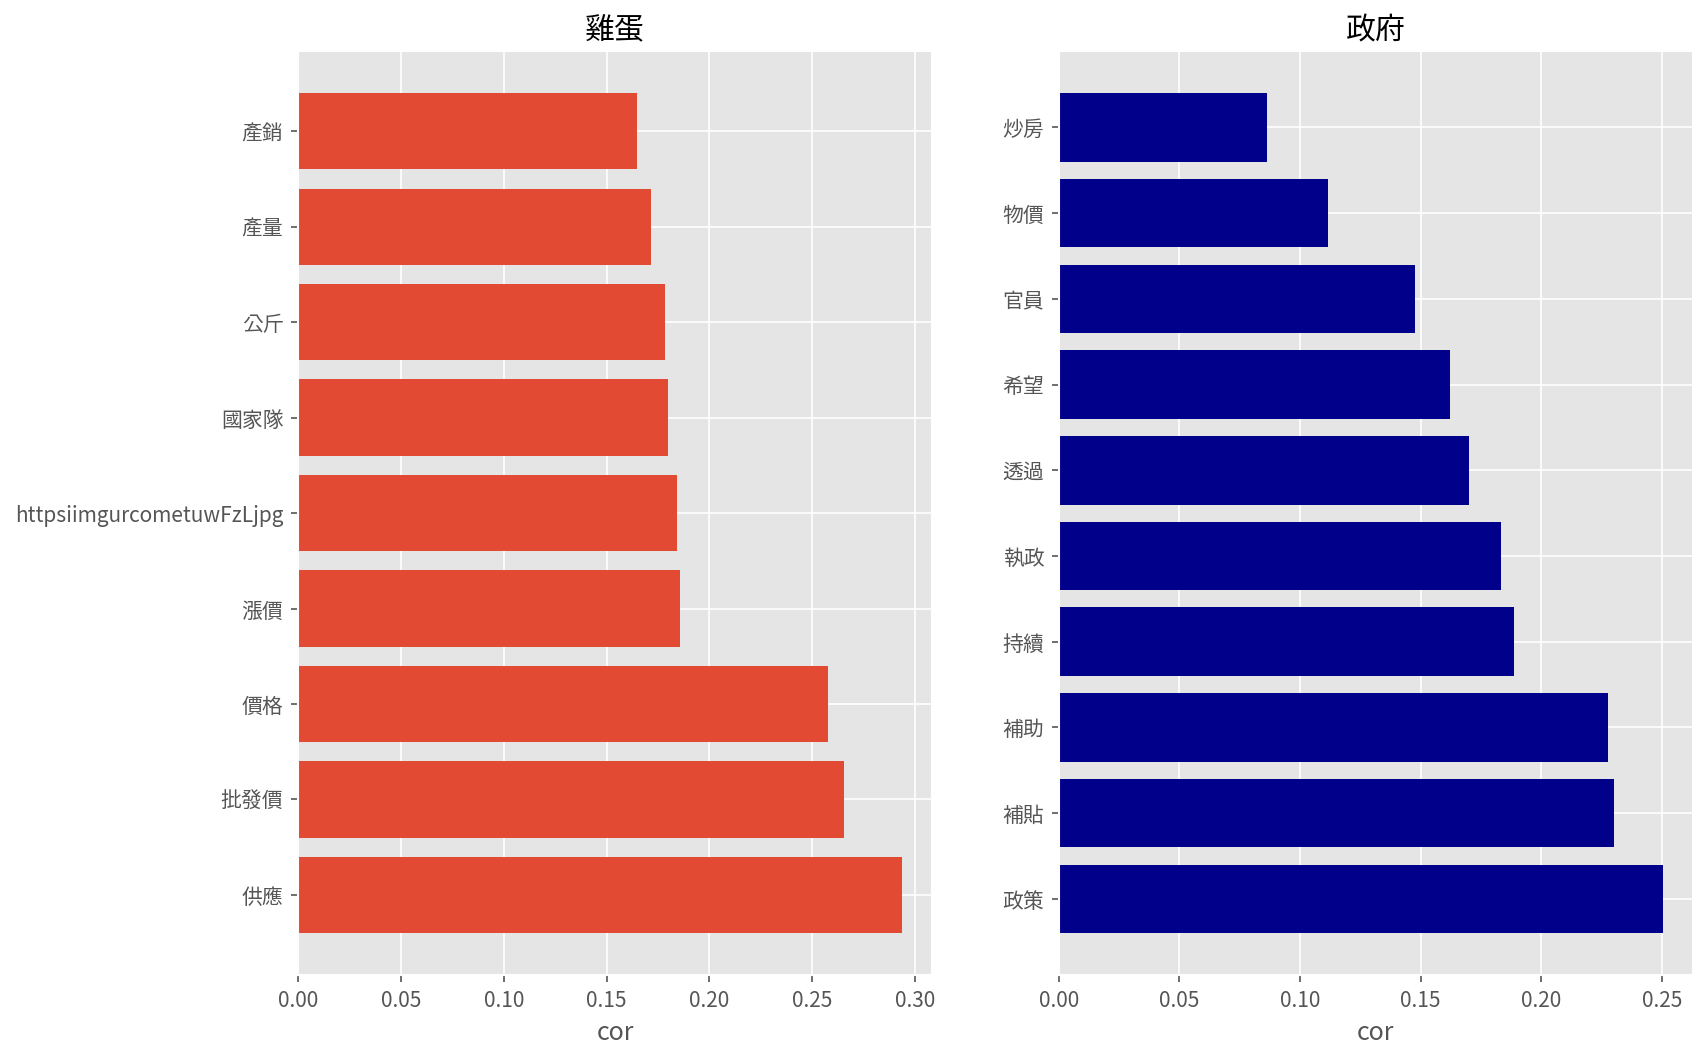

In [ ]:
plt.figure(figsize=(12,8))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式

plt.subplot(121)
plt.title('雞蛋')
plt.xlabel('cor')
plt.barh(egg_sum['word2'],egg_sum['cor'])

plt.subplot(122)
plt.title('政府')
plt.xlabel('cor')
plt.barh(gov_sum['word2'],gov_sum['cor'],color="darkblue")


plt.show()

### 6.7使用詞彙關係圖畫出相關性大於0.4的組合 

In [ ]:
bigram_df[bigram_df["cor"]>0.4].head()

,word,word2,n,cor
1,主計,總處,182,0.963686
4,俄烏,戰爭,129,0.638442
5,印度,神童,128,0.783944
11,地緣,政治,91,0.445473
13,全民,共享,87,0.609304


In [ ]:
word_cors = bigram_df[bigram_df["cor"]>0.4]
word_cors.reset_index(inplace=True, drop=True)

In [ ]:
import networkx as nx
# Create network plot 
g = nx.Graph()

# 建立 nodes 間的連結
for i in range(len(word_cors)):
    g.add_edge(word_cors["word"][i], word_cors["word2"][i], weight=word_cors["cor"][i])
    
# 取得edge權重
weights = [w[2]['weight']*10 for w in  g.edges(data=True)]

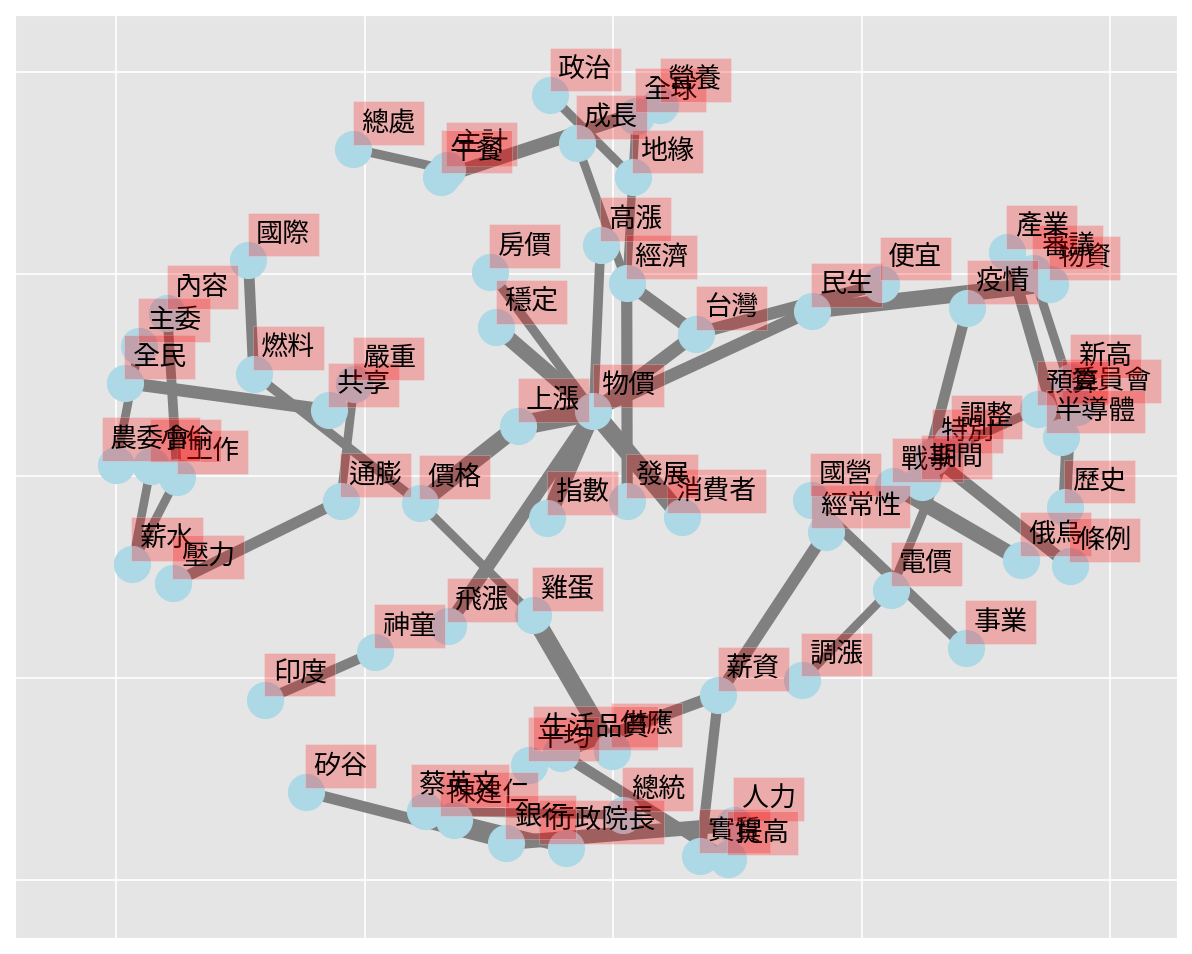

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='lightblue',
                 with_labels = False,
                 ax=ax)

# 增加 labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### 6.8 計算文章相似度

In [ ]:
data_cos= MetaData.copy()
data_cos = data_cos.loc[:,["artTitle","artDate","artUrl","sentence"]]
# 需要改成使用空格連接斷好的詞
data_cos['word'] = data_cos.sentence.apply(getToken).map(' '.join)
data_cos.head(3)

,artTitle,artDate,artUrl,sentence,word
0,[問卦]為啥日本相比台灣薪資高物價卻便宜？,2023-01-01 01:55:06,https://www.ptt.cc/bbs/Gossiping/M.1672509308....,如題啦最近看了一些IG影片介紹了一下日本東京外食很多都比台灣便宜不然就是差不多量卻很多CP很...,最近 IG 影片 介紹 一下 日本 東京 外食 台灣 便宜 CP 感覺 有沒有 為啥 日本 ...
1,[新聞]快訊／蔡英文揭新年4目標：規劃房貸補貼,2023-01-01 08:59:39,https://www.ptt.cc/bbs/Gossiping/M.1672534782....,ettoday記者呂晏慈台北報導標題快訊蔡英文揭新年目標規劃房貸補貼跨縣市交通月票內文新的一...,ettoday 呂晏慈 快訊 蔡英文 新年 目標 規劃 房貸 補貼 縣市 交通 月票 一年 ...
2,[新聞]翁達瑞挨告回台面對官司到中山大學演,2023-01-01 09:34:49,https://www.ptt.cc/bbs/Gossiping/M.1672536891....,記者許麗娟報導標題挨告回台面對官司到中山大學演講內文旅美學者在臉書以筆名評論論文案挨告月返台...,許麗娟 挨告 回台 面對 官司 中山 大學 演講 旅美 學者 臉書 筆名 評論 論文案 挨告...


In [ ]:
# Bag of Word
# 篩選至少出現在5篇文章以上的詞彙
vectorizer = CountVectorizer(min_df=5)
X = vectorizer.fit_transform(data_cos["word"])
vocabulary = vectorizer.get_feature_names_out()
# 轉成dataframe
DTM_df = pd.DataFrame(columns = vocabulary, data = X.toarray())
DTM_df

,abhigyaanand,ai,aka,app,atm,av,a片,a級,bbc,ceo,...,黨團,黨部,鼎泰豐,鼓勵,鼓吹,鼻子,齊漲,龍頭,龐大,龔明鑫
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
transformer = TfidfTransformer()  
print(transformer) 
# 將詞頻矩陣X統計成TF-IDF值
tfidf = transformer.fit_transform(X)  
# print(tfidf.toarray())

# 轉成dataframe
TFIDF_df = pd.DataFrame(columns = vocabulary, data = tfidf.toarray())
TFIDF_df

TfidfTransformer()


,abhigyaanand,ai,aka,app,atm,av,a片,a級,bbc,ceo,...,黨團,黨部,鼎泰豐,鼓勵,鼓吹,鼻子,齊漲,龍頭,龐大,龔明鑫
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 計算 cosine_similarity
def cosine_similarity(vector):
    cos_list = []
    for i in tfidf.toarray():
        score = np.dot(vector, i)  / (norm(vector) * norm(i))
        cos_list.append(score)
    df = pd.DataFrame(cos_list, columns=["cos_similarity"])
    return df

In [ ]:
print(tfidf.toarray()[1])
cos_df = cosine_similarity(tfidf.toarray()[1])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# 第一篇文章和其他文章的相似程度
cos_df.head(10)

,cos_similarity
0,0.012403
1,1.000000
2,0.039686
3,0.039635
4,0.697475
5,0.001650
6,0.001253
7,0.000000
8,0.107776
9,0.140328


In [ ]:
cos_df = cos_df.merge(data_cos, how = 'left', left_index=True, right_index=True)
# cos_df.head()
cos_df.loc[:,["cos_similarity", "artTitle", "artUrl"]].sort_values(by=['cos_similarity'], ascending=False).head(10)

,cos_similarity,artTitle,artUrl
1,1.000000,[新聞]快訊／蔡英文揭新年4目標：規劃房貸補貼,https://www.ptt.cc/bbs/Gossiping/M.1672534782....
19,0.706045,[新聞]蔡英文新年4目標：規劃租屋及房貸補貼、,https://www.ptt.cc/bbs/Gossiping/M.1672542893....
4,0.697475,[新聞]還稅於民？暫不發錢了！蔡英文：需未雨,https://www.ptt.cc/bbs/Gossiping/M.1672538094....
14,0.468583,[新聞]蔡英文提7經濟措施5隻箭落實居住正義,https://www.ptt.cc/bbs/Gossiping/M.1672541408....
10,0.390662,[新聞]總統拍板7大經濟民生振興措施,https://www.ptt.cc/bbs/Gossiping/M.1672540543....
1807,0.374492,[新聞]全球經濟動盪蔡英文要公務員達成「四個,https://www.ptt.cc/bbs/Gossiping/M.1675809934....
42,0.322851,[新聞]錢要花在刀口上蔡英文：沒討論發錢、消,https://www.ptt.cc/bbs/Gossiping/M.1672580264....
172,0.303416,[新聞]蔡英文一次說明4500億怎麼用 1800億部分,https://www.ptt.cc/bbs/Gossiping/M.1672731090....
180,0.276994,[新聞]快訊／允諾發現金囉！蔡英文證實：保留一,https://www.ptt.cc/bbs/Gossiping/M.1672735291....
1013,0.276529,[新聞]蔡英文發表春節談話！政府新年4大目標曝,https://www.ptt.cc/bbs/Gossiping/M.1674209759....


## 7. 結論



1.   在負向情緒總數的排行中，壓力的詞佔了第一名，我們推測應為物價上漲造成民生壓力
2.   從每日平均情緒的圖中，觀察出情緒呈現負向趨勢(liwc)；但在SnowNLP的每日情緒上表現卻為持平
3.   行政官員與台電的詞彙頻繁出現，推測應為物價上漲時，鄉民對於政府的討論度變高
4.   在最常出現的Bi-gram中，出現了「物價、上漲」、「主計、總處」、「物價、指數」...等，與我們的主題高度相關
